## USED CAR PRICE ESTIMATION USING MACHINE LEARNING ALGORITHS

- Since the data cleaning and visualisation has been done on the previous notebook
- The main intention of this notebook is to standardise the data and train the model ready

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('updated_car_data.csv')

Cross Checking all the data attributes and values

In [ ]:
df.head()

,Brand,Insurance Validity,Fuel Type,Seats,Kms Driven,Ownership,Engine Displacement (in cc),Transmission,Mileage (in kmpl),Max Power (in bhp),Wheel Size,Registration Month,Registration Year,Price (in lacs),City
0,Maruti,Third Party,CNG,7,51012.0,First Owner,1373,Manual,22.80,80.9,16,Jun,2015,7.04,Mumbai
1,Renault,Third Party,Petrol,5,31782.0,First Owner,999,Manual,21.74,67.0,16,Jun,2020,4.70,Hyderabad
2,Hyundai,Third Party,Petrol,5,102028.0,First Owner,1591,Manual,17.01,121.3,16,Oct,2012,4.90,Bangalore
3,Ford,Not Available,Petrol,5,27807.0,First Owner,1196,Manual,18.16,86.8,14,Sept,2017,3.96,Kolkata
4,Maruti,Comprehensive,Diesel,5,60680.0,First Owner,1248,Manual,24.30,88.5,16,Oct,2019,9.50,Ahmedabad


In [ ]:
df.isnull().sum()

Brand                          0
Insurance Validity             0
Fuel Type                      0
Seats                          0
Kms Driven                     0
Ownership                      0
Engine Displacement (in cc)    0
Transmission                   0
Mileage (in kmpl)              0
Max Power (in bhp)             0
Wheel Size                     0
Registration Month             0
Registration Year              0
Price (in lacs)                0
City                           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10516 entries, 0 to 10515
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Brand                        10516 non-null  object 
 1   Insurance Validity           10516 non-null  object 
 2   Fuel Type                    10516 non-null  object 
 3   Seats                        10516 non-null  int64  
 4   Kms Driven                   10516 non-null  float64
 5   Ownership                    10516 non-null  object 
 6   Engine Displacement (in cc)  10516 non-null  int64  
 7   Transmission                 10516 non-null  object 
 8   Mileage (in kmpl)            10516 non-null  float64
 9   Max Power (in bhp)           10516 non-null  float64
 10  Wheel Size                   10516 non-null  int64  
 11  Registration Month           10516 non-null  object 
 12  Registration Year            10516 non-null  int64  
 13  Price (in lacs) 

In [ ]:
df.shape

(10516, 15)

In [ ]:
price = "Price (in lacs)"

Separating independent and dependent featuers

In [ ]:
X = df.drop(price, axis = 1)
y = df[price]

In [ ]:
X.head()

,Brand,Insurance Validity,Fuel Type,Seats,Kms Driven,Ownership,Engine Displacement (in cc),Transmission,Mileage (in kmpl),Max Power (in bhp),Wheel Size,Registration Month,Registration Year,City
0,Maruti,Third Party,CNG,7,51012.0,First Owner,1373,Manual,22.80,80.9,16,Jun,2015,Mumbai
1,Renault,Third Party,Petrol,5,31782.0,First Owner,999,Manual,21.74,67.0,16,Jun,2020,Hyderabad
2,Hyundai,Third Party,Petrol,5,102028.0,First Owner,1591,Manual,17.01,121.3,16,Oct,2012,Bangalore
3,Ford,Not Available,Petrol,5,27807.0,First Owner,1196,Manual,18.16,86.8,14,Sept,2017,Kolkata
4,Maruti,Comprehensive,Diesel,5,60680.0,First Owner,1248,Manual,24.30,88.5,16,Oct,2019,Ahmedabad


In [ ]:
y.head()

0    7.04
1    4.70
2    4.90
3    3.96
4    9.50
Name: Price (in lacs), dtype: float64

#### 6. <u> DATA TRANSFORMATION AND STANDARDISATION </u>

Encoding the categories of Nominal and Ordinal using OneHotEncoder and OrdinalEncoder respectively

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
num_features

Index(['Seats', 'Kms Driven', 'Engine Displacement (in cc)',
       'Mileage (in kmpl)', 'Max Power (in bhp)', 'Wheel Size',
       'Registration Year'],
      dtype='object')

In [ ]:
col_index_mapper = {}
cnt = 0

for col in X.columns:
    col_index_mapper[col] = cnt
    cnt += 1;

col_index_mapper

{'Brand': 0,
 'Insurance Validity': 1,
 'Fuel Type': 2,
 'Seats': 3,
 'Kms Driven': 4,
 'Ownership': 5,
 'Engine Displacement (in cc)': 6,
 'Transmission': 7,
 'Mileage (in kmpl)': 8,
 'Max Power (in bhp)': 9,
 'Wheel Size': 10,
 'Registration Month': 11,
 'Registration Year': 12,
 'City': 13}

For easy access of indices of attributes, created a column to index mapper

Stroing the list of nominal attributes into ohe_list which can be used further in column transformer

In [ ]:
ohe_list = [col_index_mapper['Fuel Type'],
col_index_mapper['Brand'],
col_index_mapper['Transmission'],
col_index_mapper['Registration Month'],
col_index_mapper['City']]

ohe_list

[2, 0, 7, 11, 13]

Also indexing the numeric features for ease of usage

In [ ]:
temp = []
for feature in num_features:
    temp.append(col_index_mapper[feature])

num_features = temp

- Creating a column transformer which will transform the categorical attributes and scale the numerical attributes
- The rest of the attributes are ignored/passed through

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

- __Column Transformer__ is a utility class which takes a list of transformers and applies it to mentioned columns.
- It is better and efficient than manual transformation

In [ ]:
transformer = ColumnTransformer(
    transformers = [
        ('oe_ownership', OrdinalEncoder(categories=[['Third or More Owners', 'Second Owner', 'First Owner']]), [col_index_mapper['Ownership']]),
        ('oe_insurance', OrdinalEncoder(categories=[['Others', 'Not Available', 'Third Party', 'Comprehensive']]), [col_index_mapper['Insurance Validity']]),
        ('ohe', OneHotEncoder(sparse=False, drop='first'), ohe_list),
        ('scale', StandardScaler(), num_features)
    ],
    remainder = "passthrough"
)

In [ ]:
X = transformer.fit_transform(X)
X.shape

(10516, 45)

In [ ]:
df.shape

(10516, 15)

Checking the 0th record after transformation

In [ ]:
X[0]

array([ 2.        ,  2.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  2.73714297, -0.01743086,
       -0.07130726,  0.77948805, -0.48363021,  0.14662889, -0.74623883])

Splitting the data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train[0]

array([ 2.        ,  2.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.29225191, -0.08378521,
       -0.44752658,  0.19320375, -0.52872196, -2.52727178, -2.16839314])

In [ ]:
y[0]

7.04

#### 7. <u> MODEL TRAINING </u>

Importing all the neccessary ML regressors and the evaluation metrics

In [ ]:
!pip install catboost xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.7 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR


Creating an evaluate function to give all metrics after model Training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

storing all the models in a dictionary

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVM Regressor": SVR(),
    'GradientBoosting Regressor': GradientBoostingRegressor()
}

Creating a list for models and r2 score

In [ ]:
model_list = []
r2_list =[]

Training the model looping through each model from the models dictionary

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('\n')
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.4979
- Mean Absolute Error: 2.5768
- R2 Score: 0.6796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6666
- Mean Absolute Error: 2.6607
- R2 Score: 0.6513




Lasso
Model performance for Training set
- Root Mean Squared Error: 6.2187
- Mean Absolute Error: 2.8939
- R2 Score: 0.5901
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1753
- Mean Absolute Error: 2.8855
- R2 Score: 0.5859




Ridge
Model performance for Training set
- Root Mean Squared Error: 5.4988
- Mean Absolute Error: 2.5795
- R2 Score: 0.6795
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6562
- Mean Absolute Error: 2.6630
- R2 Score: 0.6526




K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.7891
- Mean Absolute Error: 1.4305
- R2 Score: 0.8478
-----------------

Results

Sorting each model based on its r2 score on test data

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.920687
7,CatBoosting Regressor,0.896360
5,Random Forest Regressor,0.881226
4,Decision Tree,0.864212
10,GradientBoosting Regressor,0.834290
3,K-Neighbors Regressor,0.758953
9,SVM Regressor,0.723182
2,Ridge,0.652551
0,Linear Regression,0.651272
8,AdaBoost Regressor,0.642892


It is seen that __XGBOOST__ regressor performs well among all others.

Thus working individually on xgboost regressor

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [ ]:
y_pred

array([7.5257688, 6.7886925, 6.1412163, ..., 9.151995 , 5.8999767,
       7.227758 ], dtype=float32)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 score:", r2)

MSE: 7.303105318760824
MAE: 1.122945656713578
RMSE: 2.702425821139375
R2 score: 0.9206871765362299


Plotting the scatter plot on the actual test to predicted test values

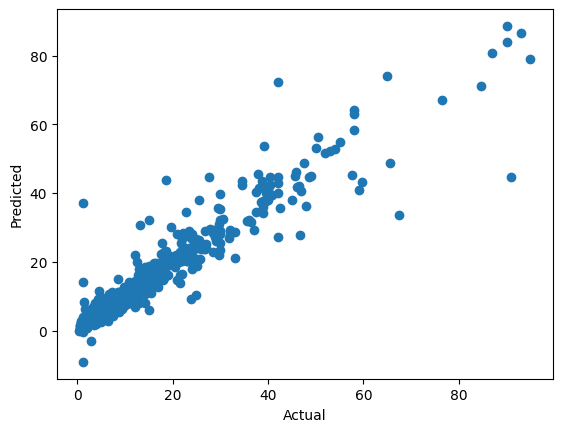

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

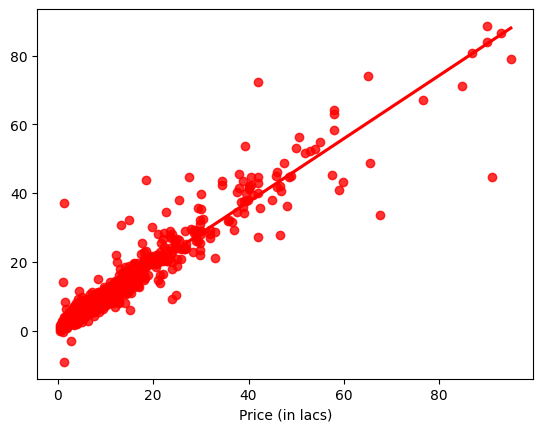

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Calculating the difference between actual and predicted values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
5841,9.65,7.525769,2.124231
9672,6.27,6.788692,-0.518692
8668,7.14,6.141216,0.998784
9321,5.10,4.551498,0.548502
3686,4.63,4.815673,-0.185673
...,...,...,...
6847,4.77,5.024378,-0.254378
1513,4.88,4.765426,0.114574
2840,9.45,9.151995,0.298005
5753,5.79,5.899977,-0.109977


Calculating the mean of the difference

In [ ]:
pred_df['Difference'].mean()

-0.008083053781351823

Performing the cross validation to check the different r2 scores of the model

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

# create KFold object with desired number of folds
kfold = KFold(n_splits=6)

# apply cross validation and compute mean R^2 score
r2_scores = cross_val_score(xgb_model, X, y, cv=kfold, scoring='r2')
mean_r2 = r2_scores.mean()

# print the mean R^2 score
print("Mean R^2 score: {:.3f}".format(mean_r2))


Mean R^2 score: 0.857


In [ ]:
r2_scores

array([0.87473497, 0.81366694, 0.82660546, 0.87297739, 0.89026452,
       0.86432149])

It is observed that the model gived the r2 scores of below during splits of 6
1. Max r2 score: 89
2. Min r2 score: 81


# Hyperparameter Optimisation

## RandomSearchCV and GridSearchCV

Creating tha dictionary i.e., __random_grid__ with all the possible parameters for xgboost

In [ ]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

random_grid ={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

Applying RandomSearchCV on the random_grid along with __xgboost_regressor__

In [ ]:
xgb= xgboost.XGBRegressor()

xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, verbose=2)

The best parameters generated are as follows

In [ ]:
params_random = xgb_random.best_params_
params_random

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

Stroing the xgboost estimator with the best parameters into model named __best_random__

In [ ]:
best_random = xgb_random.best_estimator_ 

Predicting the X_test data on the model

In [ ]:
y_pred=best_random.predict(X_test)
y_pred

array([8.127964 , 6.3732033, 6.346237 , ..., 8.754362 , 5.7913256,
       7.281247 ], dtype=float32)

It is seen that the r2 score has decreased by 2%

In [ ]:
r2_score(y_test, y_pred)

0.9087603659143884

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 score:", r2)

MSE: 8.401323113617321
MAE: 1.2123821115653959
RMSE: 2.8985035990347368
R2 score: 0.9087603659143884


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
5841,9.65,8.127964,1.522036
9672,6.27,6.373203,-0.103203
8668,7.14,6.346237,0.793763
9321,5.10,4.141830,0.958170
3686,4.63,5.176318,-0.546318
...,...,...,...
6847,4.77,5.283165,-0.513165
1513,4.88,5.011687,-0.131687
2840,9.45,8.754362,0.695638
5753,5.79,5.791326,-0.001326


In [ ]:
pred_df['Difference'].mean()

0.022656168874071562

In [ ]:
params_random

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

Creating a __params_grid__ dictionary with values inspired by __params_random__

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid ={
    'min_child_weight' : [1,2],
    'max_depth': [3,4,5],
    'learning_rage': [params_random['learning_rate'], 0.025],
    'gamma': [params_random['gamma'],0.1],
    'colsample_bytree': [params_random['colsample_bytree'],0.2,0.5],
    'n_estimators': [200, 250, 300, 350]
}

params_grid

{'min_child_weight': [1, 2],
 'max_depth': [3, 4, 5],
 'learning_rage': [0.05, 0.025],
 'gamma': [0.2, 0.1],
 'colsample_bytree': [0.4, 0.2, 0.5],
 'n_estimators': [200, 250, 300, 350]}

Applying GridSearchCV on the random_grid along with __xgboost_regressor__

In [ ]:
xgb= xgboost.XGBRegressor()

grid_search=GridSearchCV(estimator=xgb,param_grid=params_grid,cv=5,n_jobs=-1,verbose=2)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[06:59:05] WARNING: ../src/learner.cc:767: 
Parameters: { "learning_rage" } are not used.



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.2, 0.5],
                         'gamma': [0.2, 0.1], 'learning_rage': [0.05, 0.025],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2],
                         'n_estimators': [200, 250, 300, 350]},
             verbose=2)

The best parameters that are shortlisted is shown below

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rage': 0.05,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 350}

In [ ]:
best_grid=grid_search.best_estimator_
best_grid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rage=0.05,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=350, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
y_pred=best_grid.predict(X_test)
y_pred

array([7.751213 , 6.107422 , 5.8202486, ..., 8.667568 , 5.607085 ,
       7.083621 ], dtype=float32)

The evaluation metrics are shown below

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 score:", r2)


MSE: 6.171276221827109
MAE: 1.1124119215289687
RMSE: 2.484205350172789
R2 score: 0.9329790109598219


It is seen that r2 score has been improved by 2%

In [ ]:
new_data = X_test[13].reshape(1,-1)

In [ ]:
best_grid.predict(new_data)

array([4.8064175], dtype=float32)

Thus, the model is ready to predict the prices for new data of used cars